# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data

In [2]:
df=pd.read_csv("C:\\Users\\engineering\\Downloads\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Understand the Data
- **age:age in year**
- **sex: Male=1 ,Female=0**
- **cp: Chest pain experienced (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)**
- **trestbps: resting blood pressure in (mmHg), Ideal blood pressure is considered to be between 90/60 mmHg and 120/80 mmHg, High 140/90 mmHg or higher, Low 90/60 mmHg or Lower**
- **chol: Serum cholestoral in mg/dL the normal range in (All aged 19 and younger at most 170 mg/dL) and (in aged 20 and older 125-200 mg/dL)**
- **fbs: the person's fasting blood suger (>120 mg/dL) (1=True, 0=False)**
- **restecg: Resting electrocardiographic measurmeant (0 = normal, 1 = having ST-T wave abnormal, 2 = showing probable or definite left ventricular hypertrophy)**
- **thalach: The person's maximum heart rate achieved**
- **exang: Exercise induced angina (1 = yes; 0 = no)**
- **oldpeak: ST depression induced by exercise relative to rest**
- **slope: the slope of the peak exercise ST segment ( 1: upsloping, 2: flat, 3: downsloping)**
- **ca: number of major vessels (0-3) colored by flourosopy** 
- **thal: Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin. (3 = normal; 6 = fixed defect; 7 = reversable defect)**
- **target: Heart disease (1= True, 0= False)**

# Analyzing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### How many rows and columns in the data?

In [4]:
df.shape

(303, 14)

#### 303 rows and 14 colums

## Check the null values

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### no null values

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


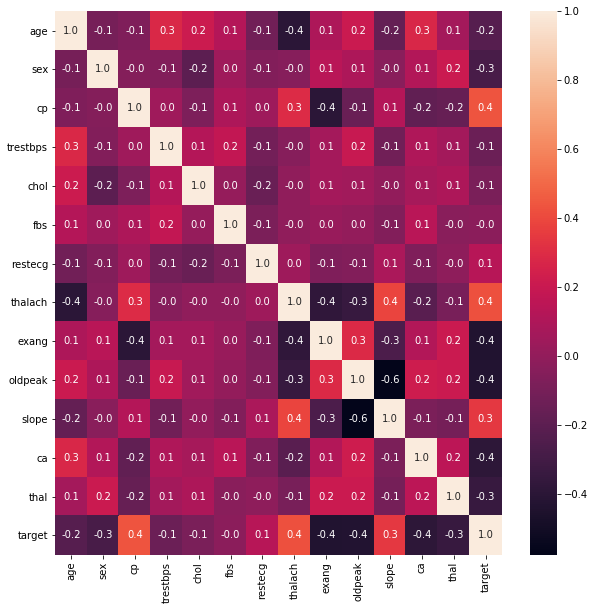

In [7]:
plt.figure(figsize=(10,10))
corr= df.corr()
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

### the values (thalach) and (cp) is strongest +ve correlated and values (exang) and (oldpeak) and (ca) in strongest -ve correlated

# Visualization

In [8]:
min_age= min(df['age'])
max_age= max(df['age'])
print('Minmum age is',min_age)
print('Maximum age is',max_age)

Minmum age is 29
Maximum age is 77


In [9]:
young_ages=df[(df['age']>=29)&(df['age']<40)]
middle_ages=df[(df['age']>=40)&(df['age']<55)]
elderly_ages=df[(df['age']>55)]
print('Young Ages is',len(young_ages))
print('Middle Ages is',len(middle_ages))
print('Elderly Ages is',len(elderly_ages))

Young Ages is 16
Middle Ages is 128
Elderly Ages is 151



### split the age into 3 category (Young, Middle, Elderly) to easly in visualization and more accurate

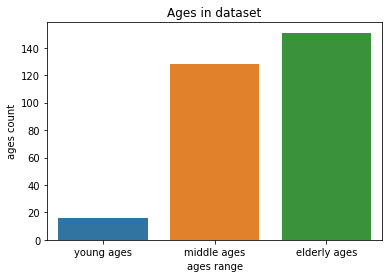

In [10]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.title('Ages in dataset')
plt.xlabel('ages range')
plt.ylabel('ages count');

### It is obvious that elderly is more range 

In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

### male more than female

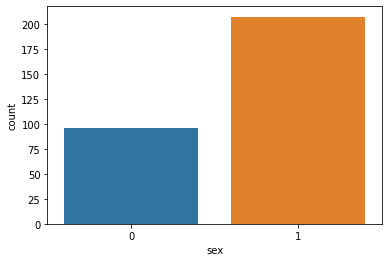

In [12]:
sns.countplot(df['sex']);

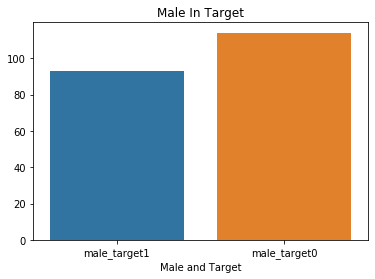

In [13]:
male_target1 =len(df[(df['sex']==1) & (df['target']== 1)])
male_target0 =len(df[(df['sex']==1) & (df['target']== 0)])
sns.barplot(x=['male_target1','male_target0'], y=[male_target1,male_target0])
plt.title('Male In Target')
plt.xlabel('Male and Target')
plt.show()

 ### the rate of disease is less when the gender value is male

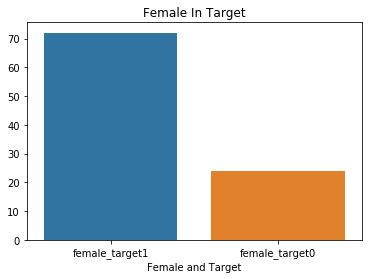

In [14]:
female_target1 =len(df[(df['sex']==0) & (df['target']== 1)])
female_target0 =len(df[(df['sex']==0) & (df['target']== 0)])
sns.barplot(x=['female_target1','female_target0'], y=[female_target1,female_target0])
plt.title('Female In Target')
plt.xlabel('Female and Target')
plt.show()

 ### the rate of disease is more when the gender value is female

In [15]:
df['cp'].value_counts()


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

- ***1: typical angina= 143*** 
- ***2: atypical angina= 87*** 
- ***3: non-anginal pain= 50***
- ***4: asymptomatic= 23***

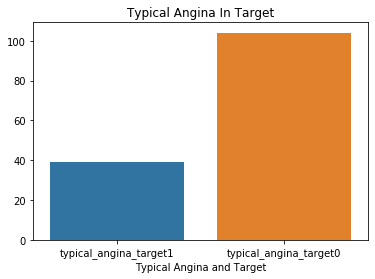

In [16]:
typical_angina_target1 =len(df[(df['cp']==0) & (df['target']== 1)])
typical_angina_target0 =len(df[(df['cp']==0) & (df['target']== 0)])
sns.barplot(x=['typical_angina_target1','typical_angina_target0'], y=[typical_angina_target1,typical_angina_target0])
plt.title('Typical Angina In Target')
plt.xlabel('Typical Angina and Target')
plt.show()

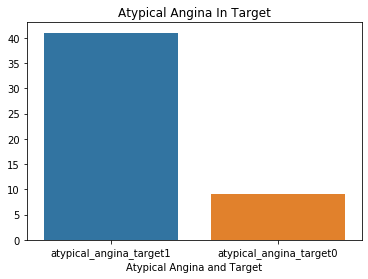

In [17]:
atypical_angina_target1 =len(df[(df['cp']==1) & (df['target']== 1)])
atypical_angina_target0 =len(df[(df['cp']==1) & (df['target']== 0)])
sns.barplot(x=['atypical_angina_target1','atypical_angina_target0'], y=[atypical_angina_target1,atypical_angina_target0])
plt.title('Atypical Angina In Target')
plt.xlabel('Atypical Angina and Target')
plt.show()

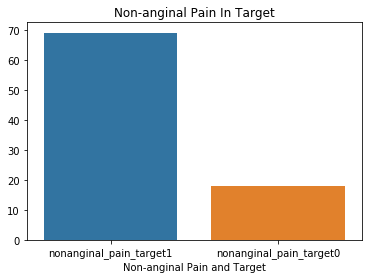

In [18]:
nonanginal_pain_target1 =len(df[(df['cp']==2) & (df['target']== 1)])
nonanginal_pain_target0 =len(df[(df['cp']==2) & (df['target']== 0)])
sns.barplot(x=['nonanginal_pain_target1','nonanginal_pain_target0'], y=[nonanginal_pain_target1,nonanginal_pain_target0])
plt.title('Non-anginal Pain In Target')
plt.xlabel('Non-anginal Pain and Target')
plt.show()

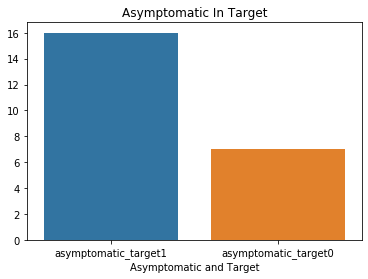

In [19]:
asymptomatic_target1 =len(df[(df['cp']==3) & (df['target']== 1)])
asymptomatic_target0 =len(df[(df['cp']==3) & (df['target']== 0)])
sns.barplot(x=['asymptomatic_target1','asymptomatic_target0'], y=[asymptomatic_target1,asymptomatic_target0])
plt.title('Asymptomatic In Target')
plt.xlabel('Asymptomatic and Target')
plt.show()

## InTypical Angina cases with chest pain are less common with heart disease. But on the other hand, there are problems in all other cases of chest pain

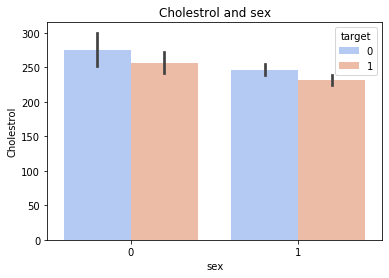

In [20]:
sns.barplot(y='chol',data=df,x='sex',hue='target',palette='coolwarm')
plt.title('Cholestrol and sex')
plt.xlabel('sex')
plt.ylabel('Cholestrol');

### Female have higher cholestrol than men

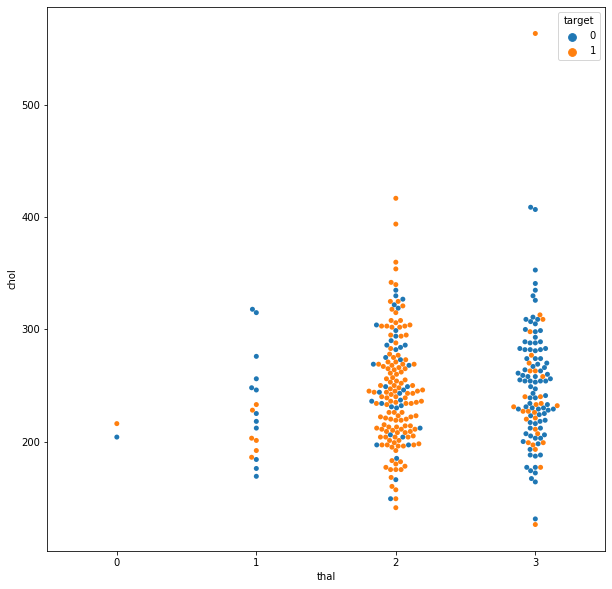

In [21]:
plt.figure(figsize=(10,10))
sns.swarmplot(y='chol',data=df,x='thal',hue='target')
plt.show();

### Chance of heart diseases increases with increase in Cholestrol level.

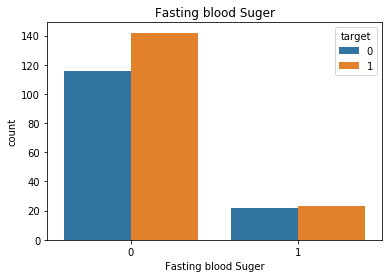

In [22]:
sns.countplot(df['fbs'],hue=df['target'])
plt.title('Fasting blood Suger')
plt.xlabel('Fasting blood Suger')
plt.show()

## In case  Fasting blood Suger < 120 have more chance of having Heart Disease than people havnig Fasting blood Suger >120

In [23]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

- ***0: Normal= 147***
- ***1: ST-T wave abnormal= 152***
- ***2: left ventricular hypertrophy= 4***

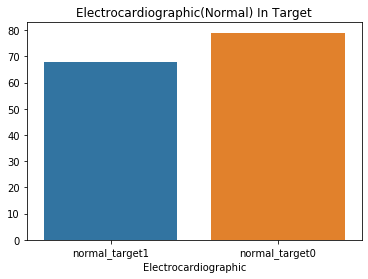

In [24]:
normal_target1 =len(df[(df['restecg']==0) & (df['target']== 1)])
normal_target0 =len(df[(df['restecg']==0) & (df['target']== 0)])
sns.barplot(x=['normal_target1','normal_target0'], y=[normal_target1,normal_target0])
plt.title('Electrocardiographic(Normal) In Target')
plt.xlabel('Electrocardiographic')
plt.show()

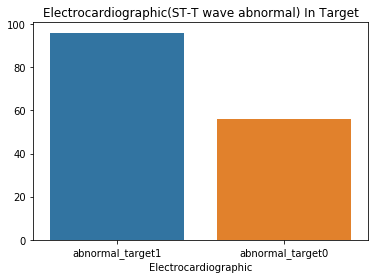

In [25]:
abnormal_target1 =len(df[(df['restecg']==1) & (df['target']== 1)])
abnormal_target0 =len(df[(df['restecg']==1) & (df['target']== 0)])
sns.barplot(x=['abnormal_target1','abnormal_target0'], y=[abnormal_target1,abnormal_target0])
plt.title('Electrocardiographic(ST-T wave abnormal) In Target')
plt.xlabel('Electrocardiographic')
plt.show()

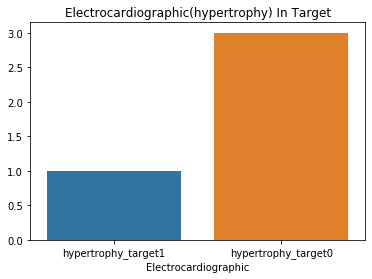

In [26]:
hypertrophy_target1 =len(df[(df['restecg']==2) & (df['target']== 1)])
hypertrophy_target0 =len(df[(df['restecg']==2) & (df['target']== 0)])
sns.barplot(x=['hypertrophy_target1','hypertrophy_target0'], y=[hypertrophy_target1,hypertrophy_target0])
plt.title('Electrocardiographic(hypertrophy) In Target')
plt.xlabel('Electrocardiographic')
plt.show()

## In ST-T wave abnormal cases with Electrocardiographic are more common with heart disease. But on the other hand, there are problems in all other cases of Electrocardiographic


In [27]:
cp_thalach=df.groupby('cp')['thalach'].mean()

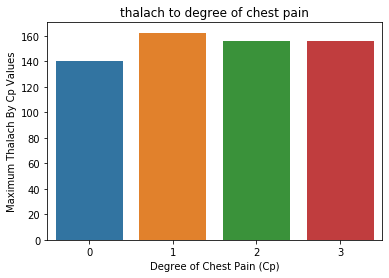

In [28]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('thalach to degree of chest pain')
plt.show()

### When the heart rate is less when the chest pain is low. But in cases where chest pain is typical Angina, it is observed that the area is more. atypical Angina and Non-anginal Pain were found to be of the same degree.

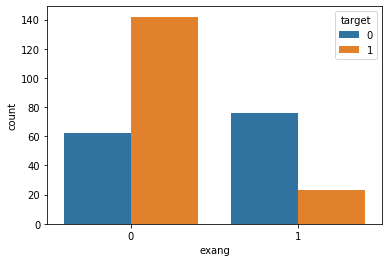

In [29]:
sns.countplot(df['exang'],hue=df['target']);

### In case doesn't make exercise induced angina(0) have more chance of having Heart Disease than people havnig exercise induced angina(1)

In [30]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

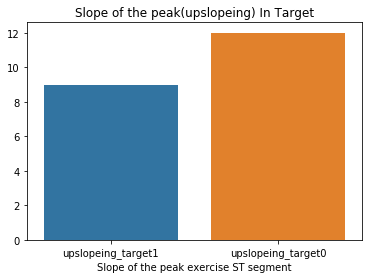

In [31]:
upslopeing_target1 =len(df[(df['slope']==0) & (df['target']== 1)])
upslopeing_target0 =len(df[(df['slope']==0) & (df['target']== 0)])
sns.barplot(x=['upslopeing_target1','upslopeing_target0'], y=[upslopeing_target1,upslopeing_target0])
plt.title('Slope of the peak(upslopeing) In Target')
plt.xlabel('Slope of the peak exercise ST segment')
plt.show()

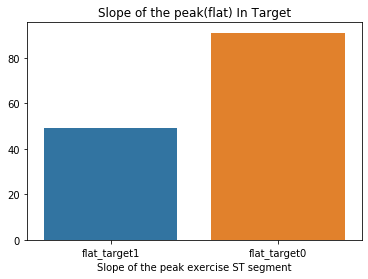

In [32]:
flat_target1 =len(df[(df['slope']==1) & (df['target']== 1)])
flat_target0 =len(df[(df['slope']==1) & (df['target']== 0)])
sns.barplot(x=['flat_target1','flat_target0'], y=[flat_target1,flat_target0])
plt.title('Slope of the peak(flat) In Target')
plt.xlabel('Slope of the peak exercise ST segment')
plt.show()

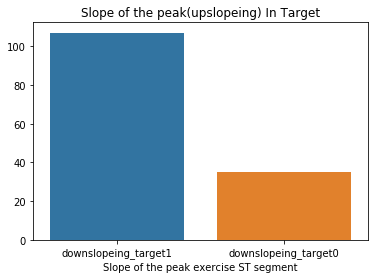

In [33]:
downslopeing_target1 =len(df[(df['slope']==2) & (df['target']== 1)])
downslopeing_target0 =len(df[(df['slope']==2) & (df['target']== 0)])
sns.barplot(x=['downslopeing_target1','downslopeing_target0'], y=[downslopeing_target1,downslopeing_target0])
plt.title('Slope of the peak(upslopeing) In Target')
plt.xlabel('Slope of the peak exercise ST segment')
plt.show()

### In cases upslopeing with chest pain are more common with heart disease. But on the other hand, there are problems in all other cases of chest pain¶


In [34]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

- ***0 mean no Thalassemia in blood= 2***
- ***1 mean Thalassemia is normal in blood= 18***
- ***2 mean Thalassemia is fixed defect= 166***
- ***3 mean Thalassemia is reversable defect= 117***

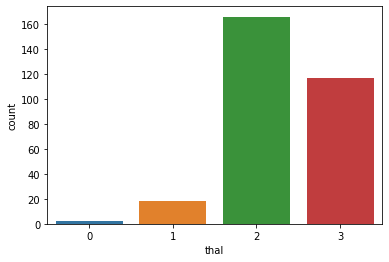

In [35]:
sns.countplot(df['thal']);

In [36]:
# see the value of thal in target 1
m= len(df[(df['thal']==0) & (df['target']==1)])
A= len(df[(df['thal']==1) & (df['target']==1)])
r= len(df[(df['thal']==2) & (df['target']==1)])
w= len(df[(df['thal']==3) & (df['target']==1)])
print('No Thalassemia and اhave heart disease:',m)
print('Normal Thalassemia and اhave heart disease:',A)
print('Fixed defect in Thalassemia and اhave heart disease:',r)
print('Reversable defect Thalassemia and اhave heart disease:',w)

No Thalassemia and اhave heart disease: 1
Normal Thalassemia and اhave heart disease: 6
Fixed defect in Thalassemia and اhave heart disease: 130
Reversable defect Thalassemia and اhave heart disease: 28


In [37]:
# see the value of thal in target 0
a= len(df[(df['thal']==0) & (df['target']==0)])
n= len(df[(df['thal']==1) & (df['target']==0)])
g= len(df[(df['thal']==2) & (df['target']==0)])
l= len(df[(df['thal']==3) & (df['target']==0)])
print("No Thalassemia and doesn't have heart disease:",a)
print("Normal Thalassemia and doesn't have heart disease:",n)
print("Fixed defect in Thalassemia and doesn't have heart disease:",g)
print("Reversable defect Thalassemia and dpesn't have heart disease:",l)

No Thalassemia and doesn't have heart disease: 1
Normal Thalassemia and doesn't have heart disease: 12
Fixed defect in Thalassemia and doesn't have heart disease: 36
Reversable defect Thalassemia and dpesn't have heart disease: 89


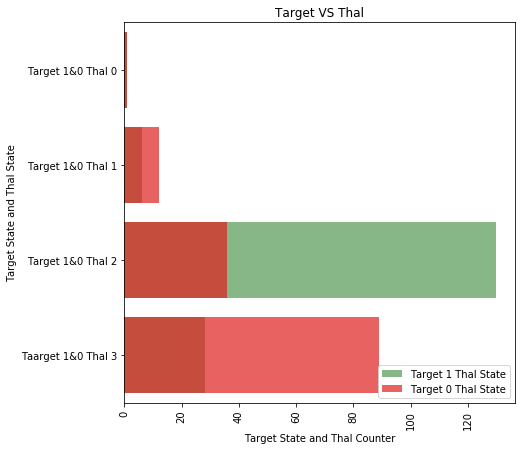

In [38]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['Target 1&0 Thal 0','Target 1&0 Thal 1','Target 1&0 Thal 2','Target 1&0 Thal 3'],x=[1,6,130,28],color='green',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['Target 1&0 Thal 0','Target 1&0 Thal 1','Target 1&0 Thal 2','Taarget 1&0 Thal 3'],x=[1,12,36,89],color='red',alpha=0.7,label='Target 0 Thal State')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()

##  In case Fixed defect(Target 1&0 Thal 2) is more chance to have heart disease and Reversable defect (Target 1&0 Thal 3)case is more chance to doesn't have heart disease

# Spliting Data

In [76]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn import preprocessing

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## We find the outliers and MinMaxScaler() it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler.

# what is the Robust Scaler?
### The Robust Scaler uses a similar method to the (Min-Max scaler) but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers.
# Formula = X - Q1(x) / Q3(x) - Q1(x) 
### For each feature.Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.
### Notice that after Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.
### However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.

In [79]:
scaler =preprocessing.RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression Model

In [80]:
Accuracies= {} # make dictionry to save all accuracies models
from sklearn.linear_model import LogisticRegression

# define model
lg = LogisticRegression()

# parameters
parameters=[{'penalty':['l1','l2'],'C':[0.1,0.4,0.5],'random_state':[0]}]

#define search
search = GridSearchCV(lg, parameters, scoring='accuracy', n_jobs=-1, )

# execute search
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8181972789115646
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'random_state': 0}


In [81]:
# make function to draw the plot ROC to easly

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# What is AUC - ROC Curve?
### - AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

## The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

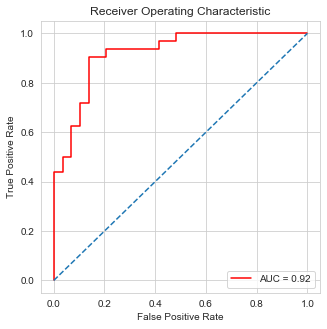

In [83]:
lr=LogisticRegression(C=0.1,penalty='l2',random_state=0)
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
y_proba=lr.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 86.89%
Logistic TRAIN score with  0.8553719008264463
Logistic TEST score with  0.8688524590163934

[[25  4]
 [ 4 28]]


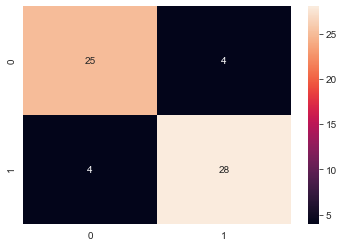

In [84]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['Logistic Regression'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Logistic TRAIN score with ",format(lr.score(x_train, y_train)))
print("Logistic TEST score with ",format(lr.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

# KNN Model

In [85]:
from sklearn.neighbors import KNeighborsClassifier

# define model
knn = KNeighborsClassifier()

# parameters
parameters=[{'n_neighbors':np.arange(2,33),'n_jobs':[2,6]}]

# define search
search = GridSearchCV(knn, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8098639455782312
Best Hyperparameters: {'n_jobs': 2, 'n_neighbors': 7}


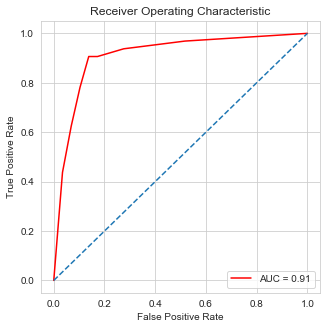

In [86]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=7)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

y_proba=knn.predict_proba(x_test)
#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 88.52%
KNN TRAIN score with  0.8553719008264463
KNN TEST score with  0.8852459016393442

[[25  4]
 [ 3 29]]


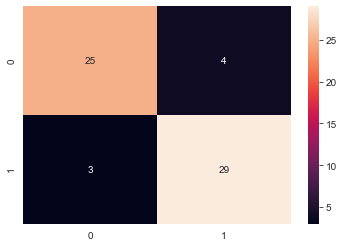

In [89]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['KNN'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("KNN TRAIN score with ",format(knn.score(x_train, y_train)))
print("KNN TEST score with ",format(knn.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

# SVM Model

In [90]:
from sklearn.svm import SVC

# define model
svc =SVC()

# parameters
parameters = [{'kernel': ['linear'],'random_state': [2]}, {'kernel': ['rbf'],'gamma':[0.9,0.06,0.3],'random_state': [0],
        'C':[1,2,3,4,5,6],'degree':[2], 'probability':[True]}]

# define search
search = GridSearchCV(svc, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8264455782312925
Best Hyperparameters: {'C': 6, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True, 'random_state': 0}


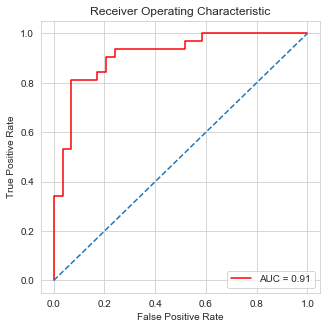

In [91]:
svc=SVC(C=6, degree=2, gamma=0.06, kernel='rbf',probability=True, random_state=0)
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)
y_proba=svc.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 83.61%
SVC TRAIN score with  0.9256198347107438
SVC TEST score with  0.8360655737704918

[[24  5]
 [ 5 27]]


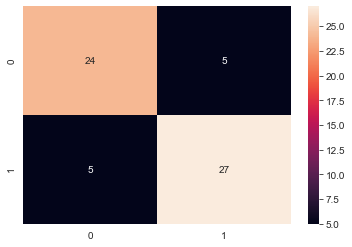

In [92]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['SVM'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("SVC TRAIN score with ",format(svc.score(x_train, y_train)))
print("SVC TEST score with ",format(svc.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
# define model
RF=RandomForestClassifier()

# parameters
parameters = [{'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),'random_state': [3],
               'n_estimators': np.arange(10, 20)}]
# define search
search = GridSearchCV(RF, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8511054421768707
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}


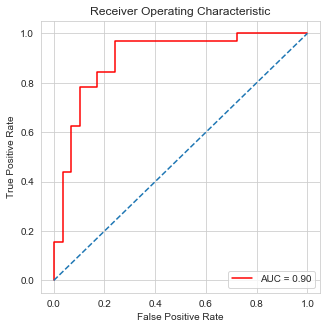

In [94]:
RF=RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=11, random_state =3)
RF.fit(x_train,y_train)

y_pred=RF.predict(x_test)
y_proba=RF.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 80.33%
Random Forest TRAIN score with  0.9256198347107438
Random Forest TEST score with  0.8360655737704918

[[24  5]
 [ 7 25]]


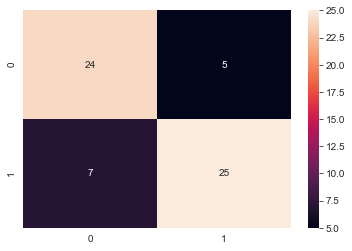

In [95]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['RF'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Random Forest TRAIN score with ",format(svc.score(x_train, y_train)))
print("Random Forest TEST score with ",format(svc.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

#  Decision Tree Model

In [96]:
from sklearn.tree import DecisionTreeClassifier
# define model
DT=DecisionTreeClassifier()

# parameters
parameters = [{'random_state': [42],}]
# define search
search = GridSearchCV(DT, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7437925170068027
Best Hyperparameters: {'random_state': 42}


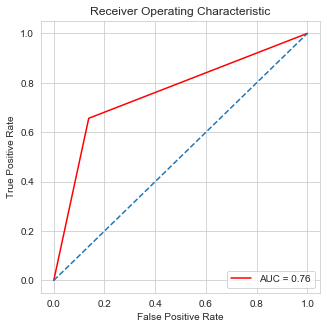

In [97]:
DT=DecisionTreeClassifier(random_state=42)
DT.fit(x_train,y_train)

y_pred=DT.predict(x_test)
y_proba=DT.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 75.41%
Decision Tree TRAIN score with  0.9256198347107438
Decision Tree TEST score with  0.8360655737704918

[[25  4]
 [11 21]]


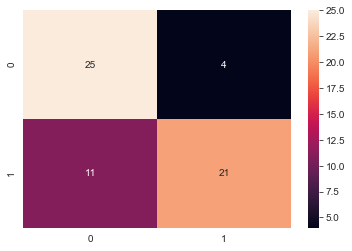

In [98]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['DT'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Decision Tree TRAIN score with ",format(svc.score(x_train, y_train)))
print("Decision Tree TEST score with ",format(svc.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

# Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
# define model
GB=GradientBoostingClassifier()

# parameters
parameters = [{'random_state': [42],}]
# define search
search = GridSearchCV(GB, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8096938775510203
Best Hyperparameters: {'random_state': 42}


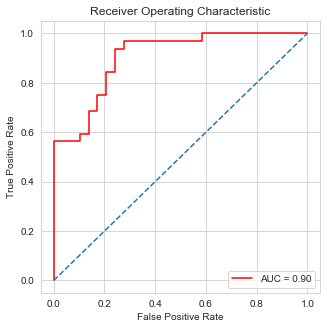

In [100]:
GB=GradientBoostingClassifier(random_state=42)
GB.fit(x_train,y_train)

y_pred=GB.predict(x_test)
y_proba=GB.predict_proba(x_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

Accuracy: 78.69%
Decision Tree TRAIN score with  0.9256198347107438
Decision Tree TEST score with  0.8360655737704918

[[23  6]
 [ 7 25]]


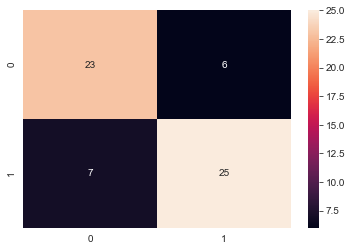

In [101]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['GB'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Decision Tree TRAIN score with ",format(svc.score(x_train, y_train)))
print("Decision Tree TEST score with ",format(svc.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

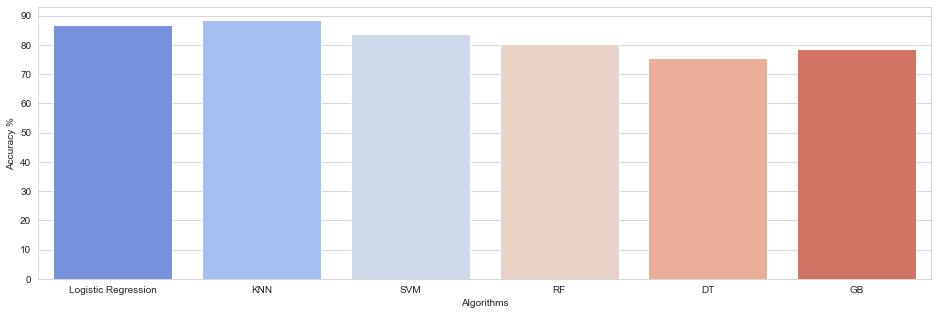

In [102]:

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()), palette='coolwarm')
plt.show()

# pickle methode

In [104]:
import pickle

In [105]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [106]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8852459016393442
